## Random Forests

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


No nulls present.

In [5]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [7]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [8]:
df.quantile([0,0.01,0.05,0.25,0.5,0.75,0.9,0.95,0.99,1])

,age,sex,BP,cholestrol,heart disease
0.00,29.00,0.0,94.0,126.00,0.0
0.01,34.69,0.0,100.0,149.00,0.0
0.05,40.00,0.0,106.9,177.00,0.0
0.25,48.00,0.0,120.0,213.00,0.0
0.50,55.00,1.0,130.0,245.00,0.0
0.75,61.00,1.0,140.0,280.00,1.0
0.90,66.00,1.0,152.0,309.00,1.0
0.95,68.00,1.0,160.0,326.55,1.0
0.99,71.93,1.0,180.0,407.62,1.0
1.00,77.00,1.0,200.0,564.00,1.0


<AxesSubplot:xlabel='age'>

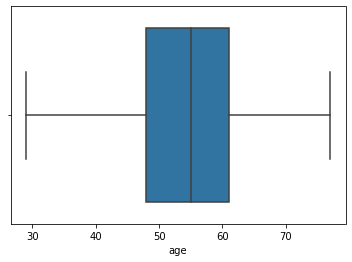

In [10]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='cholestrol'>

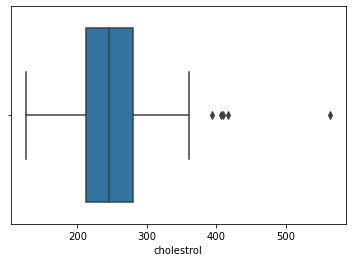

In [11]:
sns.boxplot(x=df['cholestrol'])

<AxesSubplot:xlabel='BP'>

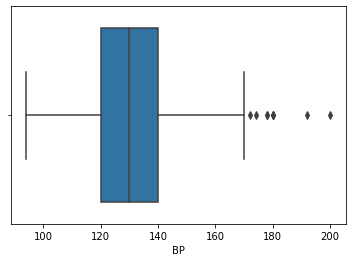

In [12]:
sns.boxplot(x=df['BP'])

Text(0.5, 1.0, 'Age VS Cholestrol')

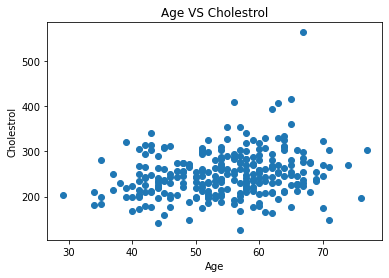

In [20]:
plt.scatter(df['age'],df['cholestrol'])
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.title('Age VS Cholestrol')

In [21]:
df.corr()

,age,sex,BP,cholestrol,heart disease
age,1.000000,-0.094401,0.273053,0.220056,0.212322
sex,-0.094401,1.000000,-0.062693,-0.201647,0.297721
BP,0.273053,-0.062693,1.000000,0.173019,0.155383
cholestrol,0.220056,-0.201647,0.173019,1.000000,0.118021
heart disease,0.212322,0.297721,0.155383,0.118021,1.000000


<AxesSubplot:>

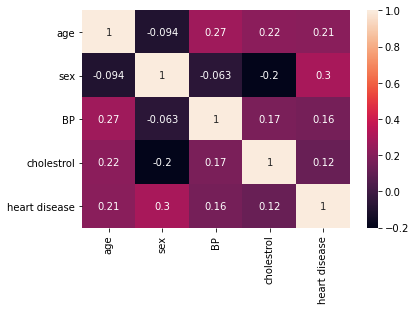

In [30]:
sns.heatmap(df.corr(), annot=True)

c:\Users\sonal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


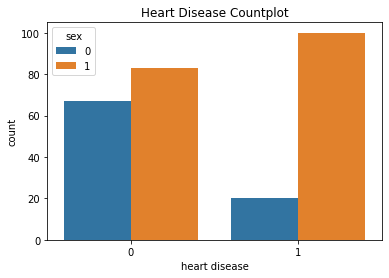

In [37]:
sns.countplot(df['heart disease'], hue=df.sex)
plt.title('Heart Disease Countplot')
plt.show()

In [38]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [39]:
X = df.drop('heart disease', axis=1)
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [41]:
y = df['heart disease']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [44]:
# performing train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
X_train.shape , y_train.shape

((216, 4), (216,))

In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=5,
n_estimators=100, oob_score=True)

In [46]:
%%time
classifier_rf.fit(X_train,y_train)

Wall time: 210 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [47]:
## Checking oob score
classifier_rf.oob_score_

0.6481481481481481

In [48]:
# Hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [52]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [53]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [54]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 25.1 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [55]:
grid_search.best_score_

0.6574074074074074

In [56]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

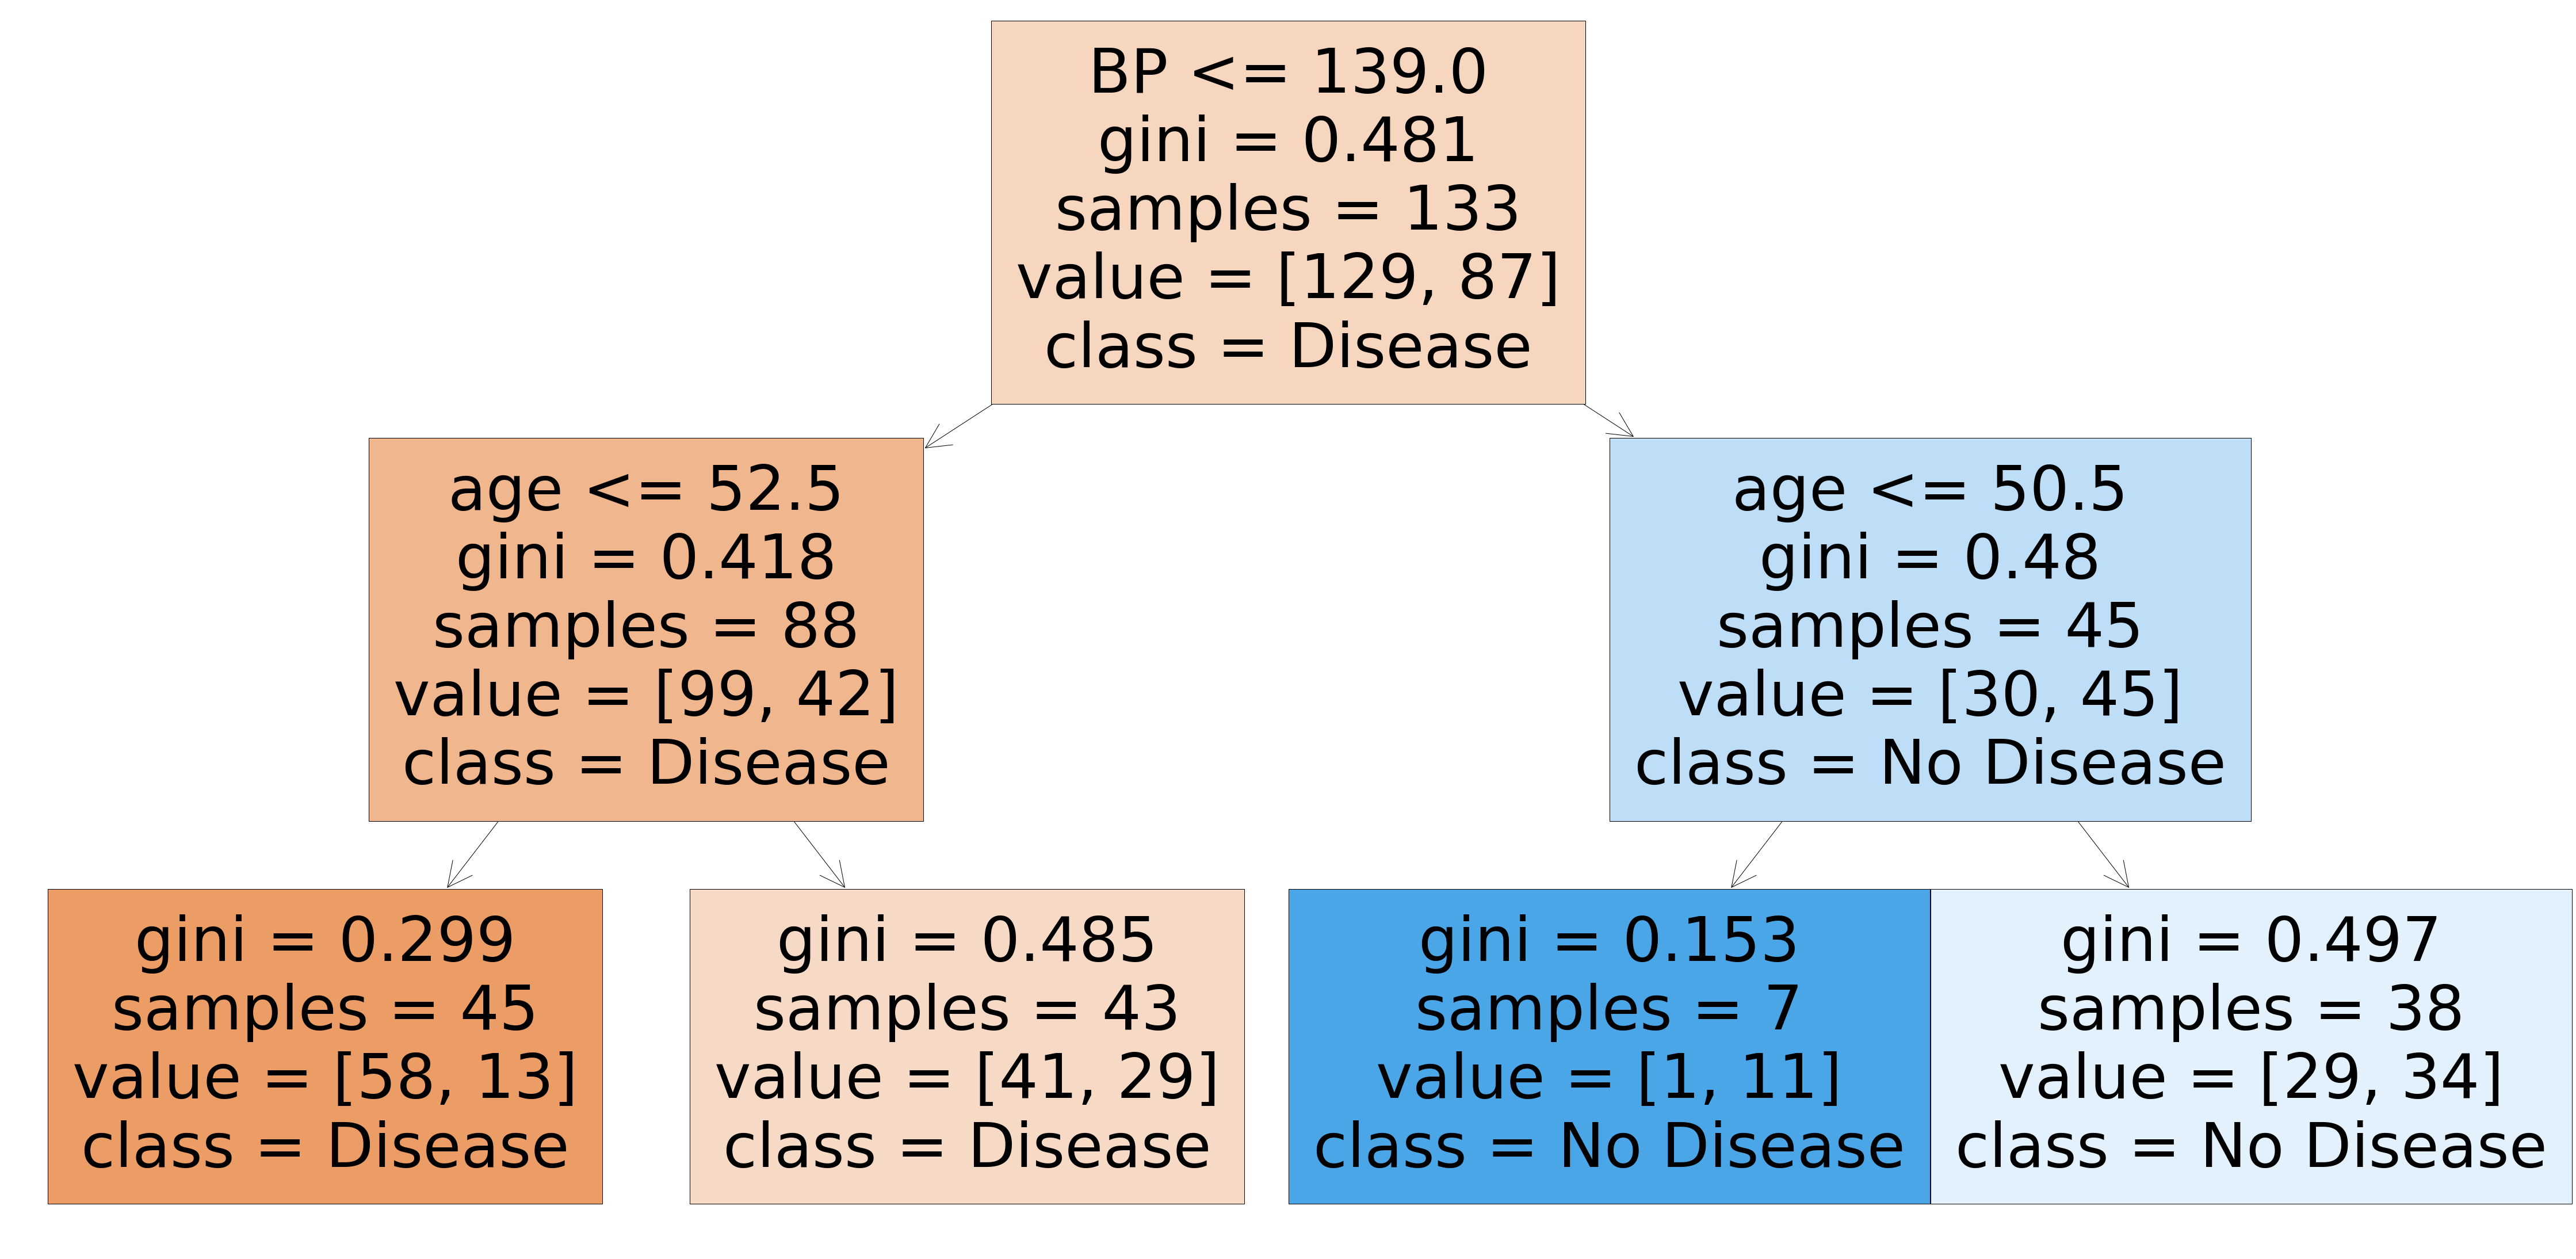

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

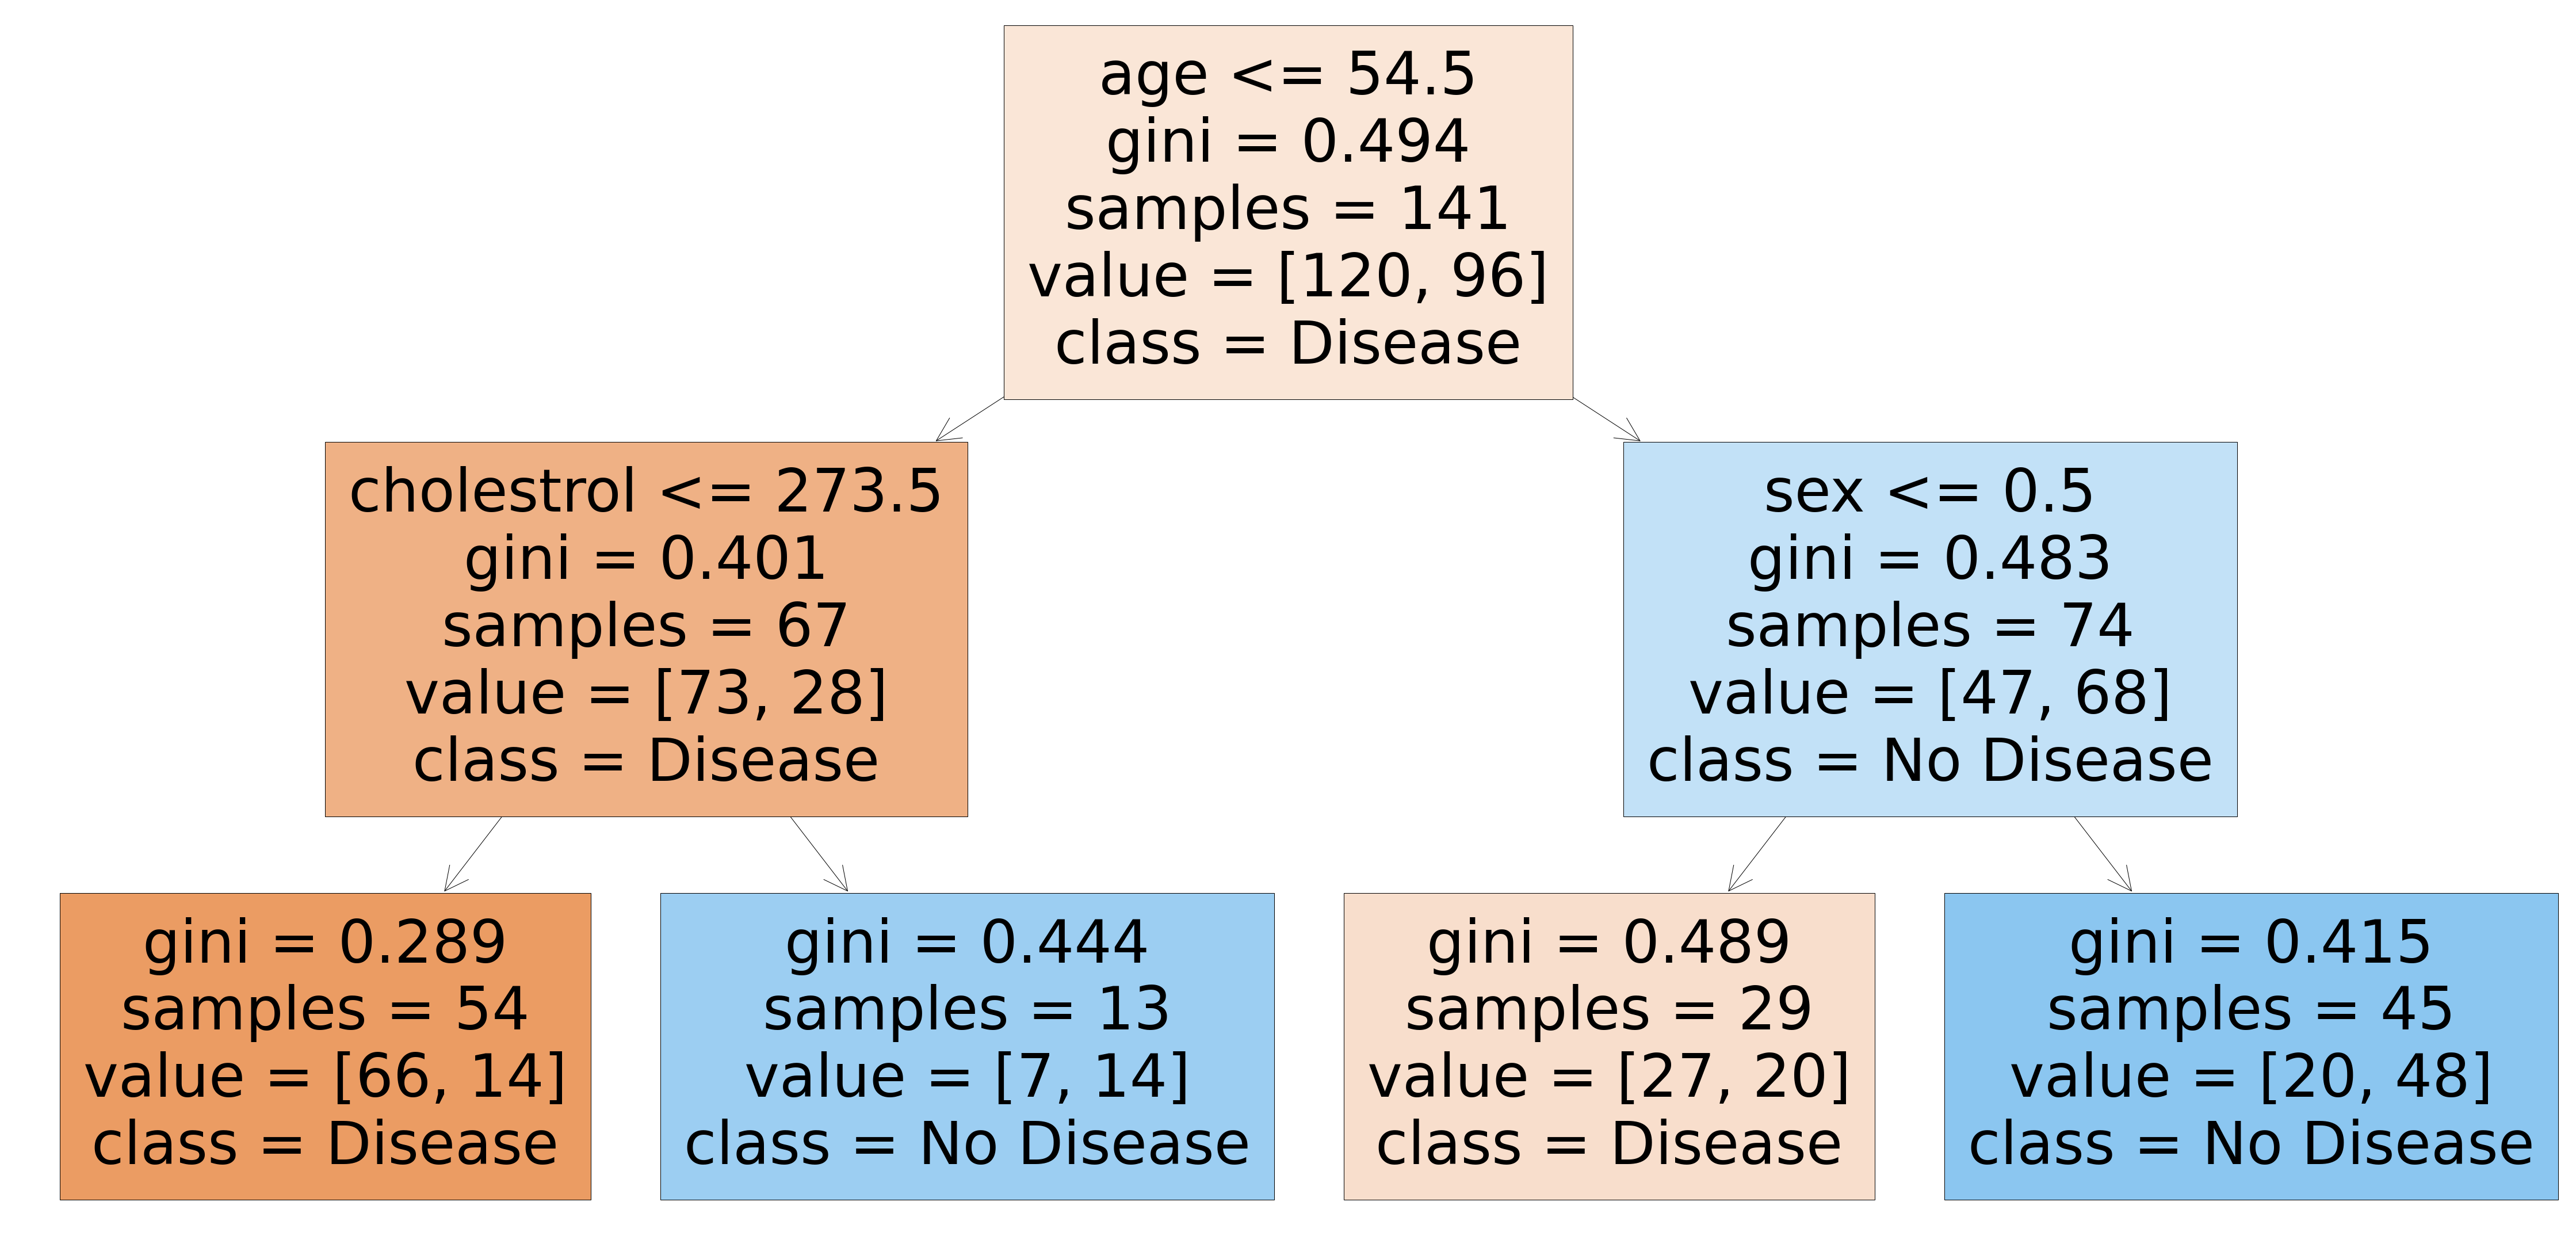

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [59]:
rf_best.feature_importances_


array([0.37650055, 0.2828522 , 0.1556078 , 0.18503944])

In [60]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [61]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.376501
1,sex,0.282852
3,cholestrol,0.185039
2,BP,0.155608
